In [1]:
import pandas as pd
import numpy as np
from os import path
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def crv(x,a,b):
    return a*np.exp(b*x)

In [8]:
dr=r"C:\google\2021fall\гидрогео"
fn=r"grace_flow.xlsx"
fr=pd.read_excel(path.join(dr,fn),sheet_name=None,index_col=[0,1])
sn=list(fr.keys())[:2]

In [23]:
fr1=fr[sn[0]].query('month > 7 and month < 11').dropna()
fr1['Q']/=348#348
fr1.mean()

ND   -6.062754
Q     6.332946
dtype: float64

In [24]:
fr2=fr1.sort_values(by=['ND'],ascending=False)
vl=fr2["Q"].to_numpy()

In [25]:
Qb=[vl[:x].min() for x in range(1, len(vl)+1)]

In [26]:
fr2["Qb"]=Qb
print(fr2["Qb"].mean())

4.481925561029006


In [27]:
#это только для северной Двины
#fr2=fr2.sort_values(by=['Qb'],ascending=False).iloc[8:]

In [28]:
[a, b], pcov = curve_fit(crv, fr1["ND"], fr1["Q"])
[c, d], pcov = curve_fit(crv, fr2["ND"]+0., fr2["Qb"])

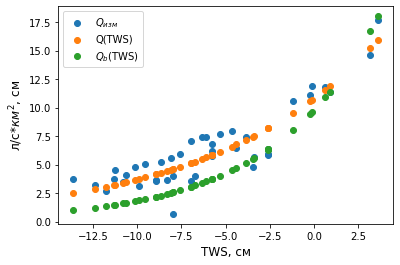

10.846641328412506 0.1074498116414434 9.837713918154067 0.16831788558940522


In [29]:
fig, ax = plt.subplots()
ax.scatter(fr1["ND"], fr1["Q"],label="$Q_{изм}$")
ax.scatter(fr1["ND"], crv(fr1["ND"], a, b),label=r"Q(TWS)")
#plt.text(0., 0., s=r"Q={0}*$e^{{1}}$".format(int(a),round(b,4)),
#         size=15, weight='normal',ha='left', va='bottom')
ax.scatter(fr1["ND"], crv(fr1["ND"], c, d),label="$Q_{b}$(TWS)")#0.15 -рандом 
ax.set_xlabel("TWS, см",fontsize=12)
ax.set_ylabel("л/с*$км^2$, см",fontsize=12)
ax.legend()
plt.show()
fig.savefig(path.join(dr,"TWS_flow_ND_KZ"+".png"),
                bbox_inches='tight', dpi=450)
plt.close(fig)
print(a,b,c,d)